# Libraries

! pip install numpy pandas sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Import data

## X

In [2]:
# For training the model
X_train_realmean = pd.read_csv("../X/Xtrainmean.csv", index_col=[0])

# For cross validation
X_valid_realmean = pd.read_csv("../X/Xvalidmean.csv", index_col=[0])

# For prediction
X_test_realmean = pd.read_csv("../X/Xtestmean.csv", index_col=[0])

In [3]:
X_train_realmean

,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,tidal volume set,tidal volume spontaneous,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine
3_145834_211552,-0.254460,-1.979855,0.0,0.0,0.0,-0.318615,0.931458,-0.226618,0.000000,-1.694872,...,0.440628,0.000000,0.0,0.0,0.0,0.000000,0.0,1.026004,0.634186,0.160067
6_107064_228232,-0.256599,-0.251806,0.0,0.0,0.0,-0.422405,1.723627,-0.254291,-0.742403,-1.444821,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.181589,0.000000
9_150750_220597,-0.269432,0.000000,0.0,0.0,0.0,-0.367050,-0.330641,-0.271686,2.097036,1.019964,...,1.039571,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.181589,0.000000
11_194540_229441,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.088963,0.000000,0.000000,0.484141,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.139623,0.000000
12_112213_232669,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.240269,0.000000,0.000000,-1.694872,...,0.680205,-1.333059,0.0,0.0,0.0,-0.317391,0.0,0.000000,-0.414731,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966_167228_252173,0.000000,1.044231,0.0,0.0,0.0,0.000000,-0.572320,0.000000,0.290121,0.091204,...,0.000000,0.000000,0.0,0.0,0.0,-0.361918,0.0,0.584864,-0.156720,0.000000
99973_150202_275083,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.290362,0.000000,-0.677870,-2.230694,...,0.000000,0.000000,0.0,0.0,0.0,-0.364145,0.0,0.973702,0.429243,0.000000
99982_151454_221194,-0.260876,1.044231,0.0,0.0,0.0,-0.297857,-0.330641,-0.261407,0.000000,1.448622,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.443803,-0.682067,0.000000
99991_151118_226241,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.753579,0.000000,0.000000,-0.051682,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.782719,-0.633884,-0.303768


## Task 1

In [4]:
y_train_t1 = pd.read_csv("../Task1/Y_train.csv",index_col=[0])
y_valid_t1 = pd.read_csv("../Task1/Y_valid.csv",index_col=[0])

In [5]:
y_train_t1_value=y_train_t1["mort_icu"]
y_valid_t1_value=y_valid_t1["mort_icu"]

# Process 1. Raw Real Mean

In [6]:
X_feature=X_train_realmean.join(y_train_t1)

### Process 1.1 Important Raw Real Mean Pairplot Visualization

In [7]:
X_feature_plot=pd.DataFrame(X_feature[["diastolic blood pressure","heart rate","temperature","glascow coma scale total","mort_icu"]])
X_feature_0=[]
X_feature_1=[]

for i in range(len(X_feature_plot)):
    if X_feature.iloc[i,-1]==0:
        X_feature_0.append(X_feature_plot.iloc[i,:])
    else:
        X_feature_1.append(X_feature_plot.iloc[i,:])

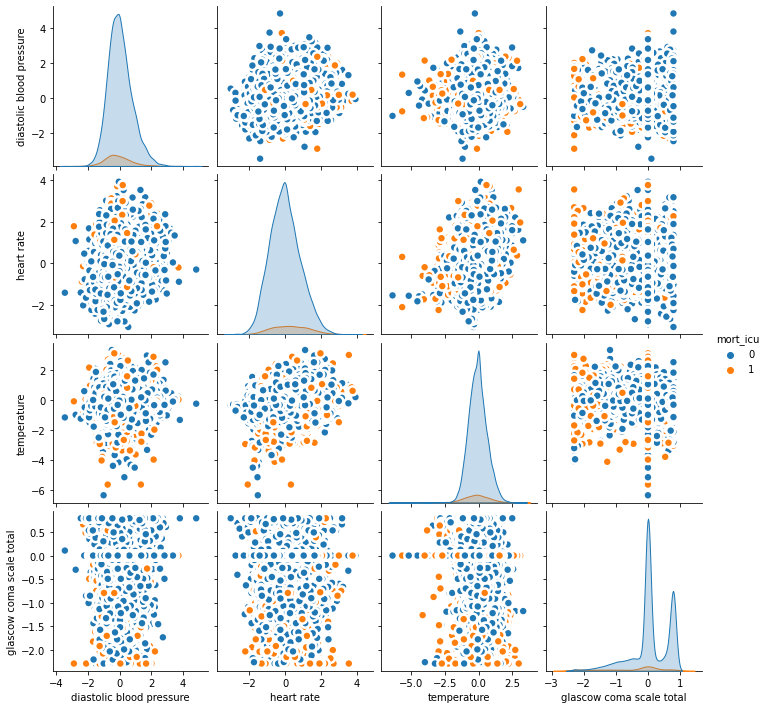

In [8]:
import seaborn as sns
sns.pairplot(X_feature_plot,kind="scatter",hue="mort_icu",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

## Process 2: Elimination of features containing 70% 0 value (call is"nozero") and Imputation

In [9]:
# Eliminate feature containing 70% 0 value
import copy
X_train_nozero=copy.deepcopy(X_train_realmean)
X_valid_nozero=copy.deepcopy(X_valid_realmean)
X_test_nozero=copy.deepcopy(X_test_realmean)
for i in X_train_realmean.columns:
    if (X_train_nozero[i] == 0).sum()> 12000:
        X_train_nozero.drop(i, axis=1, inplace=True)

headnozero=list(X_train_nozero.columns.values)
X_valid_nozero = X_valid_nozero[X_train_nozero.columns]
X_test_nozero = X_test_nozero[X_train_nozero.columns]

In [10]:
# Impute the 0 with mean
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_nozero = pd.DataFrame(imp.fit_transform(X_train_nozero))
X_train_nozero.columns=headnozero
X_train_nozero.index=X_train_realmean.index
X_valid_nozero = pd.DataFrame(imp.fit_transform(X_valid_nozero))
X_valid_nozero.columns=headnozero
X_test_nozero = pd.DataFrame(imp.fit_transform(X_test_nozero))
X_test_nozero.columns=headnozero
X_train_nozero

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,calcium,...,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,tidal volume spontaneous,troponin-t,weight,white blood cell count
3_145834_211552,-0.254460,-1.979855,-0.318615,0.931458,-0.226618,0.014621,-1.694872,-0.298127,0.792807,-1.004507,...,0.280562,0.260075,-0.638602,-0.002273,0.800876,0.440628,0.000309,-0.053738,1.026004,0.634186
6_107064_228232,-0.256599,-0.251806,-0.422405,1.723627,-0.254291,-0.742403,-1.444821,-0.444605,1.737977,-0.016061,...,-0.075873,-0.417323,1.537514,-0.518339,0.069184,0.052263,0.000309,-0.053738,-0.010417,-0.181589
9_150750_220597,-0.269432,0.061017,-0.367050,-0.330641,-0.271686,2.097036,1.019964,-0.395779,-0.439621,0.636039,...,-0.133014,-0.047833,1.723172,0.101098,0.801063,1.039571,0.000309,-0.053738,-0.010417,-0.181589
11_194540_229441,-0.140093,0.061017,-0.052863,-0.088963,-0.136461,0.014621,0.484141,-0.115158,-0.439621,0.910607,...,-0.075873,0.598773,-0.661305,-0.188482,0.069184,0.052263,0.000309,-0.053738,-0.010417,-0.139623
12_112213_232669,-0.140093,0.061017,-0.052863,1.240269,-0.136461,0.014621,-1.694872,-0.115158,0.348021,0.224186,...,0.035793,0.875890,0.603034,-0.157922,0.476344,0.680205,-1.333059,-0.317391,-0.010417,-0.414731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966_167228_252173,-0.140093,1.044231,-0.052863,-0.572320,-0.136461,0.290121,0.091204,-0.115158,-0.200239,0.407232,...,-0.075873,-0.232578,0.667703,-1.013160,0.069184,0.052263,0.000309,-0.361918,0.584864,-0.156720
99973_150202_275083,-0.140093,0.061017,-0.052863,-0.290362,-0.136461,-0.677870,-2.230694,-0.115158,-0.331513,-0.599519,...,-0.075873,0.260075,-0.389591,-0.067515,0.069184,0.052263,0.000309,-0.364145,0.973702,0.429243
99982_151454_221194,-0.260876,1.044231,-0.297857,-0.330641,-0.261407,0.014621,1.448622,-0.151648,0.116362,0.361470,...,-0.075873,-0.546644,-1.128922,-0.353408,0.069184,0.052263,0.000309,-0.053738,-0.443803,-0.682067
99991_151118_226241,-0.140093,0.061017,-0.052863,-0.753579,-0.136461,0.014621,-0.051682,-0.115158,-0.219544,-0.788284,...,-0.075873,1.014449,2.021813,0.149653,0.069184,0.052263,0.000309,-0.053738,0.782719,-0.633884


## Process 3: Normalization ##

In [11]:
scaler = preprocessing.StandardScaler()

X_train_nozero_selected=X_train_nozero.values
X_train_nozero_scaled = scaler.fit_transform(X_train_nozero_selected)
X_train_nozero_norm=pd.DataFrame(X_train_nozero_scaled)
X_train_nozero_norm.columns=headnozero
X_train_nozero_norm.index=X_train_realmean.index

X_valid_nozero_selected=X_valid_nozero.values
X_valid_nozero_scaled = scaler.fit_transform(X_valid_nozero_selected)
X_valid_nozero_norm=pd.DataFrame(X_valid_nozero_scaled)
X_valid_nozero_norm.columns=headnozero


X_test_nozero_selected=X_test_nozero.values
X_test_nozero_scaled = scaler.fit_transform(X_test_nozero_selected)
X_test_nozero_norm=pd.DataFrame(X_test_nozero_scaled)
X_test_nozero_norm.columns=headnozero

## Process 4: Imbalanced ##

### Process 4.1 Increase the result="1" samples in training set

In [12]:
Full = pd.DataFrame(np.concatenate((X_train_nozero_norm,pd.DataFrame(y_train_t1_value)),axis=1))
Full

label0 = Full[Full[61]==0]
label1 = Full[Full[61]==1]
print(label0.shape,label1.shape)

(15535, 62) (1225, 62)


In [13]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_over, y_over = oversample.fit_resample(X_train_nozero_norm, y_train_t1_value)

y_over = pd.DataFrame(y_over)
y_over.shape
x_over.shape

(31070, 61)

In [14]:
Full = pd.DataFrame(np.concatenate((x_over,y_over),axis=1))
Full

label0 = Full[Full[61]==0]
label1 = Full[Full[61]==1]
print(label0.shape,label1.shape)

(15535, 62) (15535, 62)


In [15]:
X_train_t1_balanced=x_over
X_train_t1_balanced.columns=headnozero
y_train_t1_balanced = y_over
X_train_t1_balanced.index=y_train_t1_balanced.index
X_train_t1_balanced=X_train_t1_balanced.join(pd.DataFrame(y_train_t1_balanced))


### Process 4.2 Increase the result="1" samples in validation set

In [16]:
Full = pd.DataFrame(np.concatenate((X_valid_nozero_norm,pd.DataFrame(y_valid_t1_value)),axis=1))
Full

label0 = Full[Full[61]==0]
label1 = Full[Full[61]==1]
print(label0.shape,label1.shape)

(2242, 62) (152, 62)


In [17]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_over, y_over = oversample.fit_resample(X_valid_nozero_norm, y_valid_t1_value)

y_over = pd.DataFrame(y_over)
y_over.shape
x_over.shape

(4484, 61)

In [18]:
Full = pd.DataFrame(np.concatenate((x_over,y_over),axis=1))
Full

label0 = Full[Full[61]==0]
label1 = Full[Full[61]==1]
print(label0.shape,label1.shape)

(2242, 62) (2242, 62)


In [19]:
X_valid_t1_balanced=x_over
X_valid_t1_balanced.columns=headnozero
y_valid_t1_balanced = y_over
X_valid_t1_balanced.index=y_valid_t1_balanced.index
X_valid_t1_balanced=X_valid_t1_balanced.join(pd.DataFrame(y_valid_t1_balanced))

### Process 4.3 Important balanced data pairplot visualization

In [20]:
X_train_t1_plot=pd.DataFrame(X_train_t1_balanced[["diastolic blood pressure","heart rate","temperature","glascow coma scale total","mort_icu"]])
X_train_t1_plot_0=[]
X_train_t1_plot_1=[]

for i in range(len(X_train_t1_balanced)):
    if X_train_t1_plot.loc[i,"mort_icu"]==0:
        X_train_t1_plot_0.append(X_train_t1_plot.iloc[i,:])
    else:
        X_train_t1_plot_1.append(X_train_t1_plot.iloc[i,:])

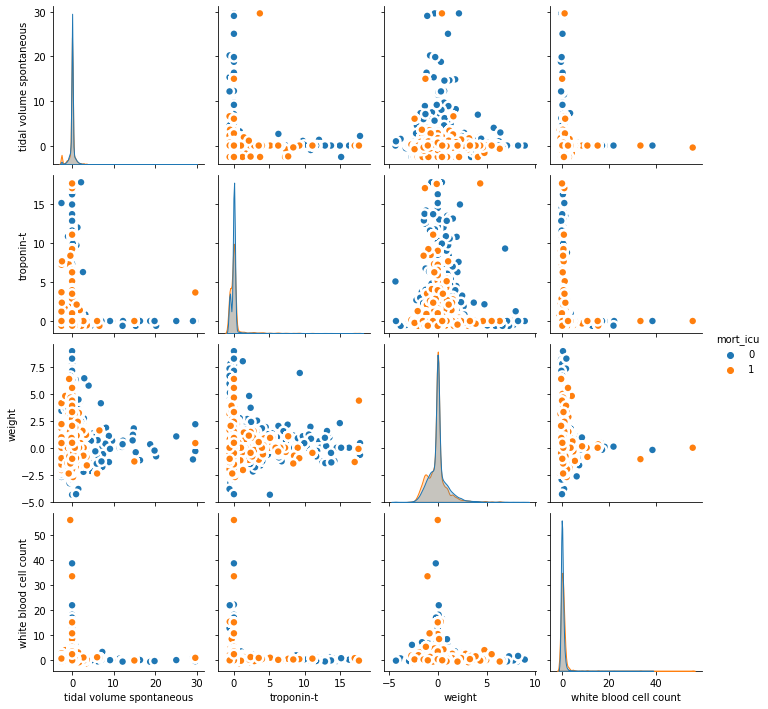

In [21]:
sns.pairplot(X_train_t1_balanced.iloc[:,-5:],kind="scatter",hue="mort_icu",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

## Process 5: Lasso feature selection

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler

In [24]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3612)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='roc_auc', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X_train_t1_balanced.iloc[:,:-1], y_train_t1_balanced)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 0.85100
Config: {'alpha': 0.0}


In [25]:
scaler = StandardScaler()
scaler.fit(X_train_t1_balanced.iloc[:,:-1])
log_=LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=3612)
sel_ = SelectFromModel(log_)
sel_.fit(scaler.transform(X_train_t1_balanced.iloc[:,:-1]), y_train_t1_balanced)
X_train_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_train_t1_balanced.iloc[:,:-1])))
X_valid_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_valid_t1_balanced.iloc[:,:-1])))
X_test_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_test_nozero_norm)))
cols=sel_.get_support(indices=True)
headnozero_new=[]
for i in cols:
    headnozero_new.append(headnozero[i])
X_train_selected_t1.columns=headnozero_new
X_valid_selected_t1.columns=headnozero_new
X_test_selected_t1.columns=headnozero_new
X_train_selected_t1

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,bilirubin,blood urea nitrogen,calcium,calcium ionized,central venous pressure,chloride,...,respiratory rate,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,troponin-t,weight,white blood cell count
0,-0.277003,-2.667943,-0.430691,0.758828,-0.300428,0.605747,-1.727395,-0.062403,-0.188729,0.860853,...,-1.493299,0.373160,0.213357,-0.665038,0.143958,1.226314,0.701559,-0.027300,1.340483,0.389123
1,-0.281075,-0.272012,-0.567742,1.563725,-0.460515,1.490337,-0.038618,-0.014795,-0.159626,-0.328417,...,-1.460593,-0.147727,-0.538466,1.981661,-0.450949,0.107019,0.127146,-0.027300,0.059894,-0.198943
2,-0.305506,0.161715,-0.494648,-0.523551,-0.407153,-0.547690,1.075504,-0.061411,-0.069880,-0.660306,...,-1.222700,-0.231231,-0.128381,2.207467,0.263122,1.226600,1.587430,-0.027300,0.059894,-0.198943
3,-0.059281,0.161715,-0.079775,-0.277989,-0.100461,-0.547690,1.544609,-0.014795,-0.069880,0.169417,...,-0.225125,-0.147727,0.589269,-0.692651,-0.070699,0.107019,0.127146,-0.027300,0.059894,-0.168692
4,-0.059281,0.161715,-0.079775,1.072601,-0.100461,0.189469,0.371848,-0.064348,-0.125177,1.109770,...,-1.053918,0.015459,0.896833,0.845100,-0.035471,0.729867,1.055908,-0.470416,0.059894,-0.367008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31065,0.485453,0.161715,-0.485511,0.409584,0.033086,0.297875,-0.331809,-0.068460,-0.069880,0.816601,...,-0.594937,0.459502,0.179183,-0.833544,-0.293416,-0.911632,-1.778880,7.065599,-1.391176,0.106262
31066,-0.258680,-0.272012,-0.576879,0.049427,-0.460515,0.052155,-0.292717,-0.014795,-0.069880,1.607604,...,-0.254044,0.952883,1.238570,-0.599385,0.664513,-0.561580,-0.848715,-0.552736,0.059894,0.161836
31067,-0.059281,0.161715,-0.079775,-0.032427,-0.100461,-0.612733,0.489124,-0.014795,-0.069880,-0.411389,...,-0.387233,0.114135,0.281705,1.304454,-0.793202,0.521585,0.701559,-0.027300,0.514523,-0.084659
31068,-0.059281,0.161715,-0.079775,-0.081539,-0.100461,-0.699458,1.485971,-0.043397,-0.069880,0.335362,...,0.027423,-0.369378,0.164538,0.940105,0.461700,-0.146333,-0.538660,-0.537769,-0.958136,-0.097144


In [26]:
X_train_selected_t1_paint=X_train_selected_t1.join(y_train_t1_balanced)

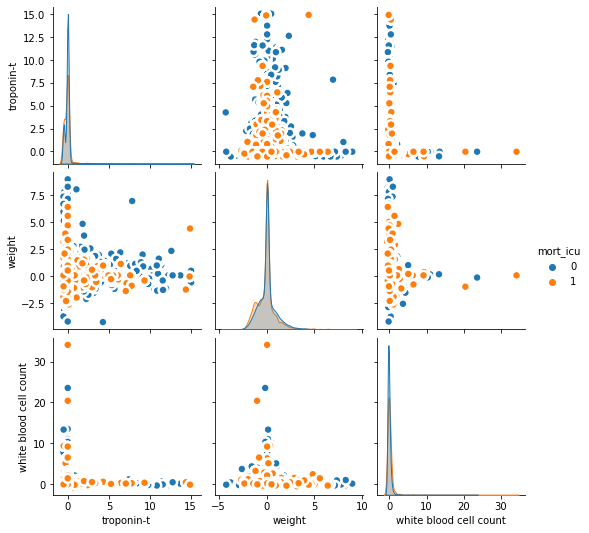

In [27]:
sns.pairplot(X_train_selected_t1_paint.iloc[:,-4:],kind="scatter",hue="mort_icu",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

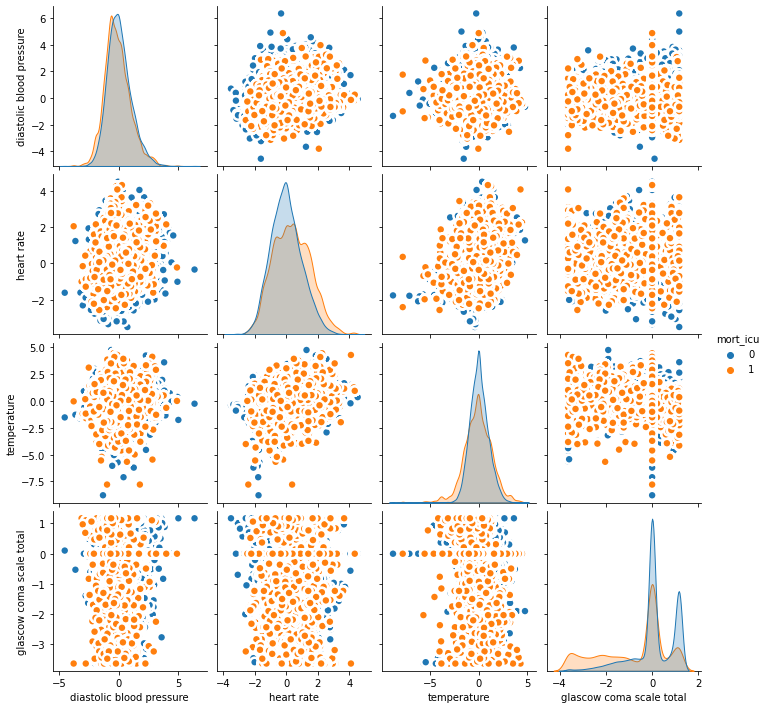

In [28]:
X_train_selected_t1_plot=pd.DataFrame(X_train_t1_balanced[["diastolic blood pressure","heart rate","temperature","glascow coma scale total","mort_icu"]])
sns.pairplot(X_train_selected_t1_plot,kind="scatter",hue="mort_icu",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

## Normalization

In [29]:
scaler = preprocessing.StandardScaler()

X_train_selected_t1=X_train_selected_t1.values
X_train_selected_t1_scaled = scaler.fit_transform(X_train_selected_t1)
X_train_selected_t1_norm=pd.DataFrame(X_train_selected_t1_scaled)


X_valid_selected_t1=X_valid_selected_t1.values
X_valid_selected_t1_scaled = scaler.fit_transform(X_valid_selected_t1)
X_valid_selected_t1_norm=pd.DataFrame(X_valid_selected_t1_scaled)


X_test_selected_t1=X_test_selected_t1.values
X_test_selected_t1_scaled = scaler.fit_transform(X_test_selected_t1)
X_test_selected_t1_norm=pd.DataFrame(X_test_selected_t1_scaled)

# Data report

In [32]:
print("*"*60)
print("There are 3 set of X")
print("X_train_selected_t1,X_valid_selected_t1,X_test_selected_t1")
print("-"*60)
print("Normalized version")
print("X_train_selected_t1_norm,X_valid_selected_t1_norm,X_test_selected_t1_norm")
print("-"*60)
print("There are 4 set of Y")
print("y_train_t1,y_valid_t1,y_valid_t1_balanced,y_valid_t1_balanced")
print("when training, please use: 'y_train_t1_value,y_valid_t1_value'")
print("*"*60)

************************************************************
There are 3 set of X
X_train_selected_t1,X_valid_selected_t1,X_test_selected_t1
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm,X_valid_selected_t1_norm,X_test_selected_t1_norm
------------------------------------------------------------
There are 2 set of Y
y_train_t1,y_valid_t1
when training, please use: 'y_train_t1_value,y_valid_t1_value'
************************************************************
